<a href="https://colab.research.google.com/github/hilaltekgz/PyCarretExample/blob/main/pycarret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 35.3 MB/s 
     |████████████████████████████████| 113 kB 58.1 MB/s 
     |████████████████████████████████| 167 kB 62.8 MB/s 
     |████████████████████████████████| 15.5 MB 36.0 MB/s 
     |████████████████████████████████| 2.0 MB 44.9 MB/s 
     |████████████████████████████████| 1.7 MB 49.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 3.9 MB/s 
     |████████████████████████████████| 261 kB 58.7 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 6.8 MB 54.0 MB/s 
     |████████████████████████████████| 1.3 MB 55.4 MB/s 
     |████████████████████████████████| 596 kB 46.2 MB/s 
     |████████████████████████████████| 10.1 MB 51.4 MB/s 
     |████████████████████████████████| 62 kB 655 kB/s 
     |█████████████████

In [1]:
import warnings
warnings.filterwarnings("ignore")
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from pycaret.regression import *

In [ ]:
def transform_to_supervised(df,
                            previous_steps=5, 
                            forecast_steps=1,
                            dropnan=True):

    """
    Transforms a DataFrame containing time series data into a DataFrame
    containing data suitable for use as a supervised learning problem.
    
    Derived from code originally found at 
    https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    
    :param df: pandas DataFrame object containing columns of time series values
    :param previous_steps: the number of previous steps that will be included in the
                           output DataFrame corresponding to each input column
    :param forecast_steps: the number of forecast steps that will be included in the
                           output DataFrame corresponding to each input column
    :return Pandas DataFrame containing original columns, renamed <orig_name>(t), as well as
            columns for previous steps, <orig_name>(t-1) ... <orig_name>(t-n) and columns 
            for forecast steps, <orig_name>(t+1) ... <orig_name>(t+n)
    """
    
    # original column names
    col_names = df.columns
    
    # list of columns and corresponding names we'll build from 
    # the originals found in the input DataFrame
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(previous_steps, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (col_name, i)) for col_name in col_names]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, forecast_steps):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % col_name) for col_name in col_names]
        else:
            names += [('%s(t+%d)' % (col_name, i)) for col_name in col_names]

    # put all the columns together into a single aggregated DataFrame
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [ ]:

data = pd.read_csv("/content/regression_data.csv")

In [ ]:
data_time_supervised = transform_to_supervised(data,10,2,dropnan=True)

In [ ]:
columsn = ['Y(t)','Y(t-1)','Y(t-2)','Y(t-3)','Y(t-4)','Y(t-5)','Y(t-6)','Y(t-7)','Y(t-8)','Y(t-9)','Y(t-10)']

for i in columsn:
  del data_time_supervised[i]

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,11.7619,836.4889,28.7915,0.8992,0.4022,0.3263,1.348
et,Extra Trees Regressor,10.3796,876.6206,29.4450,0.8949,0.3910,0.2961,91.725
rf,Random Forest Regressor,10.7553,912.6451,29.9904,0.8905,0.3935,0.3049,118.482
gbr,Gradient Boosting Regressor,13.0713,934.9868,30.4390,0.8867,0.4347,0.3731,16.187
knn,K Neighbors Regressor,14.0324,1215.4804,34.5989,0.8525,0.4542,0.3742,3.163
br,Bayesian Ridge,16.0425,1222.5635,34.7756,0.8515,0.5164,0.4559,1.271
omp,Orthogonal Matching Pursuit,16.4215,1229.7108,34.8798,0.8507,0.5394,0.4648,0.120
ridge,Ridge Regression,16.9947,1236.5645,34.9844,0.8498,0.5606,0.4769,0.112
lr,Linear Regression,17.0300,1237.8776,35.0035,0.8497,0.5615,0.4778,0.625
lasso,Lasso Regression,15.8203,1254.8024,35.2225,0.8476,0.5092,0.4563,0.389


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
ada = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,100.5404,13042.5554,114.2040,-0.3864,1.3535,3.0853
1,87.9131,10563.4948,102.7789,-0.3418,1.2694,2.7283
2,121.6866,18142.0984,134.6926,-1.3709,1.4856,3.7518
3,110.6053,15225.5863,123.3920,-0.6637,1.4183,3.4084
4,105.3745,14729.2403,121.3641,-0.6576,1.3743,3.2203
5,94.1213,11637.1862,107.8758,-0.5145,1.3234,2.9819
6,91.3618,11054.9779,105.1427,-0.2770,1.2878,2.8094
7,152.8311,26391.7399,162.4553,-2.6971,1.6812,4.8856
8,152.5589,25966.5313,161.1413,-2.7498,1.6783,4.8584
9,89.9699,11387.2626,106.7111,-0.0911,1.2592,2.6766


In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38.7956,6864.6440,82.8531,0.2703,0.7890,0.7982
1,40.1579,7420.4737,86.1422,0.0574,0.8443,0.8984
2,41.3064,7492.2985,86.5581,0.0209,0.8694,0.9182
3,41.2242,7185.9870,84.7702,0.2148,0.8360,0.8483
4,44.4456,8634.4041,92.9215,0.0283,0.8673,0.9693
5,42.9776,8079.0556,89.8836,-0.0514,0.8434,0.9260
6,38.7045,7203.4778,84.8733,0.1679,0.8126,0.8649
7,37.7489,5905.0375,76.8442,0.1728,0.8022,0.8277
8,39.6962,6666.9603,81.6515,0.0372,0.8357,0.8647
9,40.1198,7486.4196,86.5241,0.2827,0.8470,0.8844


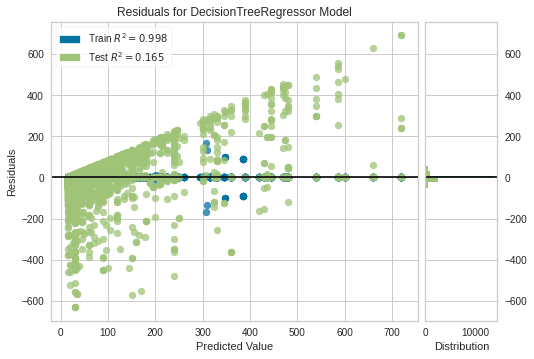

In [ ]:
plot_model(dt)

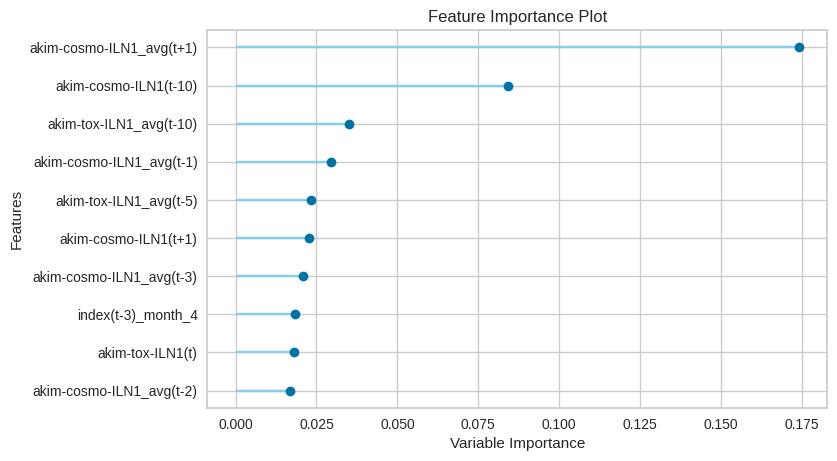

In [ ]:
plot_model(dt, plot='feature')